In [1136]:
import numpy as np
import pandas as pd
import yfinance as yf #for stock data
from IPython.display import display #for displaying the full dataframes
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for advanced data visualization
import datetime
from sklearn import preprocessing #for ML models and data processing
import itertools  #advanced tools for loops
import Extras as ex # extra utilized functions

%matplotlib inline



1) Missing Values:
Catalyst and Float
    
2) Data types:
most are correct, date and time columns need special attention in order to give them the right format.
    
3) Outliers:
some values seem unusual, for example 'Negative RRR in-trade' with a max value of 0.4 whereas the highest value should be 0.
    

In [1137]:
dt1 = pd.read_excel(r'C:\Users\liran\Documents\Day Trading Project\Live day trading 2\Live day trading 2 fixed.xlsx' , 'TABLE1')
dt2 = pd.read_excel(r'C:\Users\liran\Documents\Day Trading Project\Live Day trading 4\Live day trading 4.xlsx' , 'TABLE1')
dt3 = pd.read_excel(r'C:\Users\liran\Documents\Day Trading Project\Live day trading 5\Live day trading 5.xlsx' , 'TABLE1')
dt4 = pd.read_excel(r'C:\Users\liran\Documents\Day Trading Project\7 DEMO\Live day trading 7.xlsx' , 'TABLE1')

Example

1) Sign the tables, and remove their nulls under the "Instrument" column.

2) In dt3 and dt4 which are more recent data tables there has been a separation between 'Potential Price' and 'Potential Price in Trade', the latter is equal to 'Potential Price' in dt2 and d1 which determines the poteintial price a trade may reach without dropping back to SL. Same with 'RRR Potential in Trade' in dt3 and dt4 and 'RRR Potential' in dt2 and dt1.

3) Merge all 4 tables.


In [1138]:
#1)

dt_all = [dt1,dt2,dt3,dt4]
table_num = 0

# sign the tables by enumeration
for table in dt_all:

    table["Table Number"] = table_num 
    table = table.dropna(subset=["Instrument"])
    table_num +=1

#2)
dt3 =  dt3.drop(['Potential Price', 'Trade Potential'], axis = 1) 
dt4 = dt4.drop(['Potential Price', 'Trade Potential'], axis = 1) 


dt3.rename(columns = {'In Trade Potential Price':'Potential Price'}, inplace = True) 
dt4.rename(columns = {'In Trade Potential Price':'Potential Price'}, inplace = True)

dt3.rename(columns = {'RRR Potential in Trade':'RRR Potential'}, inplace = True) 
dt4.rename(columns = {'RRR Potential in Trade':'RRR Potential'}, inplace = True)

#3)
dt = dt1.append(dt2,ignore_index=True)
dt = dt.append(dt3,ignore_index=True)
dt = dt.append(dt4,ignore_index=True)

dt.sample(5)


,Instrument,No,Entry Date,Entry Time,Exit Time,Comissions,Gain/Loss,Quantity,Setup,Buy/Sell,...,Exit 3,lvl 2,Performance Grade,Pivot Description,SandR,Dilution,Highest Price2,Shares,Position Size,Time2
5,MXWL,6,2018-12-20 00:00:00,10:03:00,11:03:00,5.07,60.00,500.0,BO,SELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,DBVT,87,2019-03-05 00:00:00,09:50:00,09:56:00,2.02,-20.96,100.0,BO,BUY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,ATEC,71,2019-02-25 00:00:00,10:02:00,10:10:00,2.54,27.62,250.0,BO,SELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,BPTH,84,2019-03-01 00:00:00,09:55:00,10:07:00,2.02,29.04,66.0,BO,BUY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,RBZ,53,2019-05-17 00:00:00,10:45:00,10:48:00,10.25,-205.38,1000.0,BO,BUY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filtering:



1) Choose columns xyz because blah blah

2) Select only long pattern breakout setups 

3) Drop only long pattern breakout setups, due to their irrelevance

4) round all numerical vlaues to maximum 2 numbers after the decimal point. 



In [1139]:
#1)
dt = dt[["Instrument", "Entry Date","Entry Time","Exit Time","Setup","Buy/Sell","Intended Entry","Entry Price","SL Price", "Exit Price", "Highest Price", "Potential Price","Volume Exit","Wick Exit","Price Behaviour","Sector", "Catalyst", "Pattern", "Float","RRR in-trade","Negative RRR in-trade","Time","Outcome","Missed RRR on Entry","Missed RRR","RRR Potential","Hard RRR Potential","RRR Difference","RRR Realized","Table Number"]]

#2)
setups = ['BO','BOT','VBO','FPH','VF']

dt = dt[(dt['Buy/Sell'] == "BUY") & (dt['Setup'].isin(setups))].reset_index(drop=True)

#3)

# Buy/Sell column is now irrelevant because all positions in this dataset are Buy
# Setup column is also irrelevant because all setups are Break Outs or a subgroup of a Break Out trade.
dt =  dt.drop(['Buy/Sell','Setup'], axis =1)

num_colums = ["Intended Entry","Entry Price","SL Price", "Exit Price", "Highest Price", "Potential Price","Volume Exit","Wick Exit","Price Behaviour", "Catalyst", "Pattern", "Float","RRR in-trade","Negative RRR in-trade","Time","Outcome","Missed RRR on Entry","Missed RRR","RRR Potential","Hard RRR Potential","RRR Difference","RRR Realized"]

#4)
def roundUp (x):
    

    if isinstance(x, float):
        x = np.around(x,2)
        s = str(x)
        s.rstrip('0').rstrip('.') if '.' in s else s
        x = float(s)
    return x

for col in num_colums:
    dt[col] = dt[col].apply(roundUp)

In [1140]:
dt


,Instrument,Entry Date,Entry Time,Exit Time,Intended Entry,Entry Price,SL Price,Exit Price,Highest Price,Potential Price,...,Negative RRR in-trade,Time,Outcome,Missed RRR on Entry,Missed RRR,RRR Potential,Hard RRR Potential,RRR Difference,RRR Realized,Table Number
0,YECO,2018-12-13 00:00:00,09:56:00,09:59:00,5.30,5.32,5.20,5.60,5.60,6.58,...,-0.80,00:03:00,WINNER,0.20,0.20,12.60,12.80,9.80,2.80,0
1,YECO,2018-12-13 00:00:00,10:11:00,10:11:00,6.12,6.11,6.02,6.42,6.42,6.58,...,0.00,00:00:00,WINNER,-0.10,-0.10,4.70,4.60,1.60,3.10,0
2,ALQA,2018-12-14 00:00:00,10:21:00,10:29:00,3.26,3.25,3.21,3.16,3.31,3.31,...,-1.80,00:08:00,LOSER,-0.20,0.80,1.20,1.00,3.00,-1.80,0
3,INPX,2018-12-20 00:00:00,10:21:00,10:21:00,4.92,4.92,4.82,5.22,5.22,5.93,...,0.00,00:00:00,WINNER,0.00,0.00,10.10,10.10,7.10,3.00,0
4,DOVA,2018-12-21 00:00:00,10:42:00,11:01:00,6.75,6.77,6.69,6.93,6.93,6.98,...,-1.17,00:19:00,WINNER,0.33,0.33,3.50,3.83,0.83,2.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,OBLN,2019-05-30 00:00:00,10:06:00,10:11:00,1.62,1.62,1.54,1.53,1.62,1.62,...,-1.08,00:05:00,LOSER,-0.03,-0.03,0.02,0.00,1.10,-1.08,2
146,DPW,2019-12-11 00:00:00,10:20:00,11:21:00,1.15,1.15,1.06,1.37,1.70,1.70,...,-0.67,01:01:00,WINNER,0.00,0.00,6.11,6.11,3.67,2.44,3
147,ROYT,2019-12-13 00:00:00,10:15:00,10:50:00,0.53,0.53,0.50,0.62,0.70,0.70,...,-0.67,00:35:00,WINNER,0.00,0.00,5.67,5.67,2.64,3.02,3
148,POAI,2020-02-05 00:00:00,10:00:00,10:04:00,4.75,4.75,4.30,4.30,4.79,4.79,...,-1.00,00:04:00,LOSER,0.00,0.00,0.09,0.09,1.09,-1.00,3


In [1141]:
#1)
dt.isna().sum()

Instrument                0
Entry Date                0
Entry Time                0
Exit Time                 0
Intended Entry            0
Entry Price               0
SL Price                  0
Exit Price                0
Highest Price             0
Potential Price           0
Volume Exit               0
Wick Exit                 0
Price Behaviour           0
Sector                   78
Catalyst                  5
Pattern                   0
Float                     3
RRR in-trade              0
Negative RRR in-trade     0
Time                      0
Outcome                   0
Missed RRR on Entry       0
Missed RRR                0
RRR Potential             0
Hard RRR Potential        0
RRR Difference            0
RRR Realized              0
Table Number              0
dtype: int64

In [1142]:
#2)
dt.dtypes

Instrument                object
Entry Date                object
Entry Time                object
Exit Time                 object
Intended Entry           float64
Entry Price              float64
SL Price                 float64
Exit Price               float64
Highest Price            float64
Potential Price          float64
Volume Exit              float64
Wick Exit                 object
Price Behaviour           object
Sector                    object
Catalyst                  object
Pattern                   object
Float                    float64
RRR in-trade             float64
Negative RRR in-trade    float64
Time                      object
Outcome                   object
Missed RRR on Entry      float64
Missed RRR               float64
RRR Potential            float64
Hard RRR Potential       float64
RRR Difference           float64
RRR Realized             float64
Table Number               int64
dtype: object

In [1143]:
#3)

dt.describe()


,Intended Entry,Entry Price,SL Price,Exit Price,Highest Price,Potential Price,Volume Exit,Float,RRR in-trade,Negative RRR in-trade,Missed RRR on Entry,Missed RRR,RRR Potential,Hard RRR Potential,RRR Difference,RRR Realized,Table Number
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,147.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,4.584267,4.586667,4.443667,4.617333,4.802200,5.149467,2.157000,67.179932,1.724800,-1.057267,0.01620,0.276400,3.200733,3.216800,3.020533,0.180200,0.566667
std,3.459724,3.459923,3.370544,3.555130,3.621111,5.745174,3.892333,199.382760,1.317243,0.722523,0.10707,0.480611,4.832047,4.843993,3.918767,2.017635,0.689486
min,0.290000,0.290000,0.260000,0.270000,0.310000,0.310000,0.000000,0.040000,-0.050000,-2.750000,-0.33000,-0.480000,-0.050000,-0.330000,0.000000,-2.730000,0.000000
25%,2.045000,2.045000,1.955000,1.940000,2.087500,2.202500,0.000000,3.660000,0.600000,-1.665000,-0.01000,0.000000,0.632500,0.585000,1.335000,-1.320000,0.000000
50%,3.520000,3.520000,3.460000,3.920000,4.035000,4.040000,0.000000,10.650000,1.590000,-1.000000,0.00000,0.035000,1.645000,1.635000,2.225000,-0.860000,0.000000
75%,6.935000,6.935000,6.792500,6.920000,7.215000,7.215000,3.585000,37.695000,2.800000,-0.485000,0.05750,0.330000,4.215000,4.327500,3.292500,2.715000,1.000000
max,25.880000,25.880000,25.030000,28.820000,28.820000,64.000000,32.970000,1490.000000,6.110000,0.040000,0.33000,1.730000,44.850000,44.850000,41.390000,3.500000,3.000000


In [1144]:
dt.describe(include='all')  

,Instrument,Entry Date,Entry Time,Exit Time,Intended Entry,Entry Price,SL Price,Exit Price,Highest Price,Potential Price,...,Negative RRR in-trade,Time,Outcome,Missed RRR on Entry,Missed RRR,RRR Potential,Hard RRR Potential,RRR Difference,RRR Realized,Table Number
count,150,150,150,150,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150,150,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
unique,107,79,69,76,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,43,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BPTH,2019-05-15 00:00:00,10:06:00,10:07:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,00:01:00,LOSER,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,6,7,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.584267,4.586667,4.443667,4.617333,4.802200,5.149467,...,-1.057267,NaN,NaN,0.01620,0.276400,3.200733,3.216800,3.020533,0.180200,0.566667
std,NaN,NaN,NaN,NaN,3.459724,3.459923,3.370544,3.555130,3.621111,5.745174,...,0.722523,NaN,NaN,0.10707,0.480611,4.832047,4.843993,3.918767,2.017635,0.689486
min,NaN,NaN,NaN,NaN,0.290000,0.290000,0.260000,0.270000,0.310000,0.310000,...,-2.750000,NaN,NaN,-0.33000,-0.480000,-0.050000,-0.330000,0.000000,-2.730000,0.000000
25%,NaN,NaN,NaN,NaN,2.045000,2.045000,1.955000,1.940000,2.087500,2.202500,...,-1.665000,NaN,NaN,-0.01000,0.000000,0.632500,0.585000,1.335000,-1.320000,0.000000
50%,NaN,NaN,NaN,NaN,3.520000,3.520000,3.460000,3.920000,4.035000,4.040000,...,-1.000000,NaN,NaN,0.00000,0.035000,1.645000,1.635000,2.225000,-0.860000,0.000000
75%,NaN,NaN,NaN,NaN,6.935000,6.935000,6.792500,6.920000,7.215000,7.215000,...,-0.485000,NaN,NaN,0.05750,0.330000,4.215000,4.327500,3.292500,2.715000,1.000000


Data Cleaning:


1) Find flaws

2) Find outliers



In [1145]:
#1)
#unusual Dates

#change date formet to Y-M-D
dt['Entry Date']=pd.to_datetime(dt['Entry Date'], errors='coerce').dt.date

#find dates that are invalid and add them to unusual_dates, for example 2017-2-33 would be invalid
#also finds dates that are outside the expected range, 2018/12/13 to 2020/2/5 and adds them to unusual_dates
unusual_dates=[]
def is_date_valid(d):
    try:
        da = datetime.date(int(d.year),int(d.month),int(d.day))
        if da<datetime.date(2018,12,12) and da>datetime.date(2020,5,2):
            unusual_dates.append(d)
            print(d)
    except ValueError:
        unusual_dates.append(d)
        print(d)
        

dt['Entry Date'].apply(is_date_valid)


print("number of unusual dates: %d"%len(unusual_dates))

unusual_dates


number of unusual dates: 0


[]

In [1146]:

               
#2)
#Unusualtime: all trades consist of only long trades, thus the 'Entry Time' needs to be after or equal to 'Exit Time'
#all trades were opened between 9:30 and closed the latest at 16:30 (market close) that same day.

unusual_execution = dt[(dt['Entry Time'] > dt['Exit Time']) | (dt['Entry Time']<datetime.time(9, 30)) |(dt['Exit Time']>datetime.time(16, 30))]

unusual_length = dt[dt['Time']>datetime.time(8,30,0)]    

unusual_time = unusual_execution.append(unusual_length)

print("Number of rows with unusual time: %d" % (len(unusual_time)))

unusual_time


Number of rows with unusual time: 0


,Instrument,Entry Date,Entry Time,Exit Time,Intended Entry,Entry Price,SL Price,Exit Price,Highest Price,Potential Price,...,Negative RRR in-trade,Time,Outcome,Missed RRR on Entry,Missed RRR,RRR Potential,Hard RRR Potential,RRR Difference,RRR Realized,Table Number


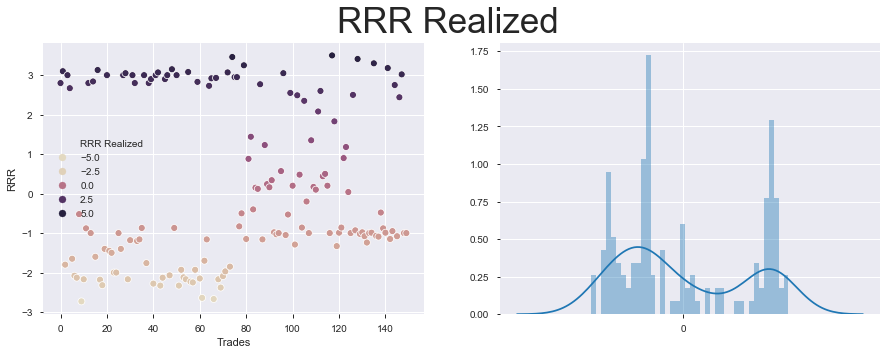

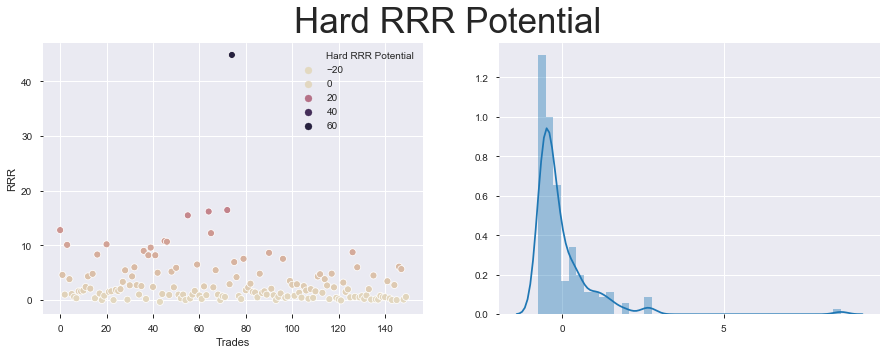

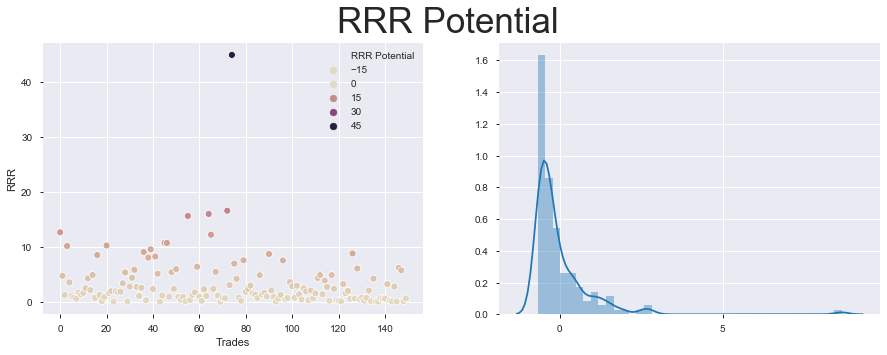

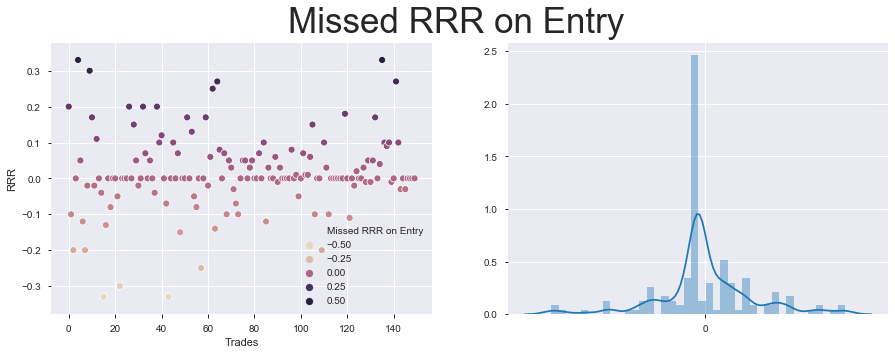

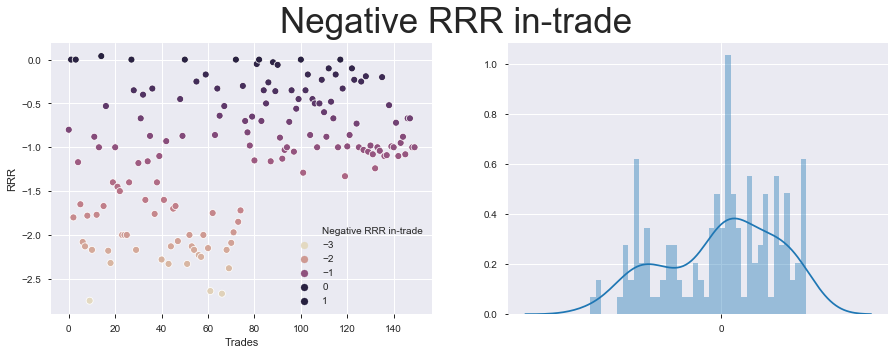

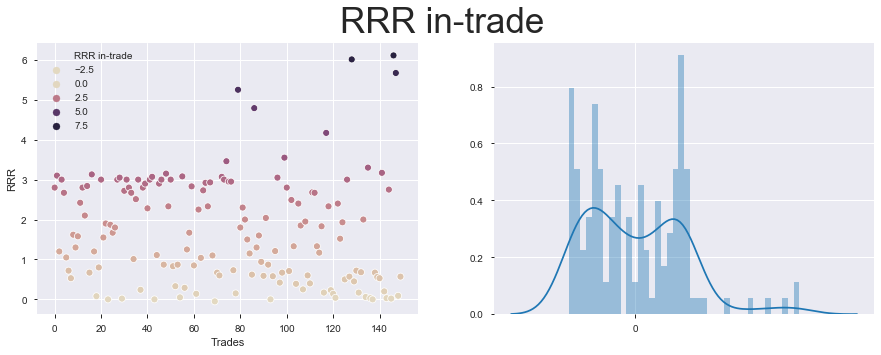

In [1147]:
#3)To Find faulty rows of 'Intended Entry', 'SL Price', 'Highest Price' and 'Potential Price' I will check for outliers:


#Plotting function
#Arguments: column = the column from dt, column_title = columns title, color = any given matplotlib plotting color

scaler = preprocessing.StandardScaler()
def plotter (column,column_title):
    
    x= np.arange(len(column))  

    
    fig, ax =plt.subplots(1,2 ,figsize = (15,5))
    fig.suptitle(column_title, size =35)
    sns.scatterplot(x,column, ax = ax[0], hue=column ,palette = "ch:s=-.2,r=.6")   
    plt.xticks(np.arange(0, len(column), step=5))   
    s= column.to_numpy().reshape(len(column),1)
    standardized = scaler.fit_transform(s)
    sns.distplot(standardized, bins = 40,ax = ax[1] )
    plt.setp(ax[0], xlabel='Trades' , ylabel = "RRR")
    #plt.setp(ax[1], xlabel='Trades' , ylabel = "Standardized RRR")

    
RRR = ['RRR Realized','Hard RRR Potential','RRR Potential','Missed RRR on Entry','Negative RRR in-trade','RRR in-trade']

for column in RRR:
    plotter(dt[column] ,column )

In [1148]:
#1)
#'RRR in-trade' ourliers, RRR above 4 (4 as a benchmark)
outliers1 = dt[dt['RRR in-trade']>4]

#2)
#'RRR in-trade' ourliers, RRR below 0 (needs to be positive or slightly negative)
outliers2 = dt[dt['RRR in-trade']<0]

#3)
# 'RRR Potential' outliers, RRR above 20 (20 as a benchmark)
outliers3 = dt[dt['RRR Potential']>20]

#4)
# 'Negative RRR in-trade', RRR above 0 (needs to be negative only)
outliers4 = dt[dt['Negative RRR in-trade']>0]

print('outliers1 length: %d \noutliers2 length: %d \noutliers3 length: %d \noutliers4 length: %d'%(len(outliers1),len(outliers2),len(outliers3),len(outliers4)))

outliers =  outliers1.append(outliers2).append(outliers3).append(outliers4)
outliers[['Instrument','RRR in-trade','RRR Potential','Negative RRR in-trade']]

outliers1 length: 6 
outliers2 length: 1 
outliers3 length: 1 
outliers4 length: 1


,Instrument,RRR in-trade,RRR Potential,Negative RRR in-trade
79,SLNO,5.25,7.50,-0.65
86,PLAG,4.79,4.79,-0.26
117,NBY,4.17,4.83,0.00
128,OTLK,6.01,6.01,-0.19
146,DPW,6.11,6.11,-0.67
147,ROYT,5.67,5.67,-0.67
69,CIFS,-0.05,-0.05,-2.38
74,BPTH,3.46,44.85,-1.72
14,UXIN,2.84,4.84,0.04


We can see some outliers within 'RRR Potential','RRR in-trade' and 'Negative RRR in-trade',I obsereved each one separately therefore will act on each one accordingly.

1) 
I chose to leave the ones in 'RRR in-trade' untoched for several reasons:
- The data with 'RRR in-trade' above 4 is valid, meaning all observation are accurate.
- Their relative outlier significance is quite small.
- They hold valuable information for better trade selection in the future, in-fact they are the "gold-nuggets" of this strategy.
Example:

2)
Even though 'RRR in-trade' needs to be a positive value, this outlier is due to positive slippage.
Slippage refers to the difference between the expected price of a trade and the price at which the trade is executed.
Since its value is only 0.04 and isn't significant compared to the rest I decided to round it down to 0.


3)
After observing the outlier, the data and the trades screenshot that represets it I decided to drop the row. 

4)
Even though 'Negative RRR in-trade' needs to be a negative value, this one outlier is due to positive slippage.
Since its value is only 0.04 and isn't significant compared to the rest I decided to round it down to 0.

Note: the instances mentioned above are only a visible fracture of the correction made, most of the corrections were done locally due to their interactiveness betweens cells with excel functions.


In [1149]:
# drop the row in outlier2 from dt
dt =  dt[dt['RRR Potential']<=20].reset_index(drop=True)

#roundup the value from outlier2 to 0
dt['Negative RRR in-trade'].apply(lambda x: 0 if x<0 else x)

# rounddown the value from outlier3 to 0
dt['Negative RRR in-trade'].apply(lambda x: 0 if x>0 else x)

0     -0.80
1      0.00
2     -1.80
3      0.00
4     -1.17
       ... 
144   -1.08
145   -0.67
146   -0.67
147   -1.00
148   -1.00
Name: Negative RRR in-trade, Length: 149, dtype: float64

Catogorial features unique data presentation:

- Price Behaviour: Stuck and Slow, Fast Reversal, Moderate, Strong BO, Quick SL. (5)

- Catalyst: H,L ,C or NaN (recall we got some empty rows). (4)

- Pattern: ST, P, DT, AT, F, R. (6)

- Sector: Healthcare, Technology, Industrial Goods, Basic Materials, Financial, Utilities, Consumer Goods, Conglomerates. (8)

- Outcome: WINNER, LOSER or BE. (3)






In [1150]:
for feature in ['Price Behaviour', 'Catalyst','Pattern', 'Sector', 'Outcome']:
    unique_count = len(dt[feature].unique())
    print("\nThe Number of unique values in '%s' is %d."%(feature, unique_count))


The Number of unique values in 'Price Behaviour' is 5.

The Number of unique values in 'Catalyst' is 4.

The Number of unique values in 'Pattern' is 6.

The Number of unique values in 'Sector' is 8.

The Number of unique values in 'Outcome' is 3.
